### **Proceso ETL (Extract, Transform, Load)**

Para llevar a cabo un análisis completo del mercado de telecomunicaciones en Argentina, implementaré un proceso ETL que organizará los datos y los preparará para el análisis exploratorio. Este proceso constará de tres etapas:

**Extracción:**
Extraeré los datos del archivo **internet.xlsx**, que contiene 15 hojas con información clave sobre el acceso a internet, la cobertura de telefonía, y otros aspectos relevantes en Argentina.

**Transformación:**
Convertiré cada una de las hojas en archivos CSV independientes, unificando el formato de los datos para simplificar el análisis y evitar inconsistencias.

**Carga:**
Almacenaré los archivos CSV en una carpeta específica llamada Datasets, organizándolos para el análisis exploratorio que realizaré a continuación.

---

Este proceso ETL permitirá que los datos queden preparados y estructurados de manera óptima, estableciendo una base sólida para el análisis de patrones y tendencias en el sector de telecomunicaciones en Argentina.


### **Librerías**

Importo las librerías necesarias para el análisis y manejo de archivos.

In [1]:
import pandas as pd
import openpyxl
import os
import warnings
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

#### **Manejo de Warnings**

Se implementará el manejo de warnings para suprimir mensajes no críticos durante el procesamiento de datos, asegurando una salida limpia y centrada en los resultados importantes.

In [2]:
# Ignorar warnings no críticos para mantener la salida limpia
warnings.filterwarnings("ignore")

### **Extracción y Transformación en un proceso de ETL.**
Cargo los archivo Excel `internet.xlsx` y convierto cada una de las 15 hojas del archivo en archivos CSV independientes.

In [3]:
# Definir la ruta del archivo Excel
ruta_archivo = 'C:/Users/NOTEBOOK/Desktop/Proyecto_ConectandoArgentina/Datasets/Internet.xlsx'

# Cargar el archivo Excel
excel_data = pd.ExcelFile(ruta_archivo)

# Iterar sobre cada hoja del archivo Excel y guardarlas como CSV
for hoja in excel_data.sheet_names:
    df = excel_data.parse(hoja)  # Leer cada hoja
    # Guardar la hoja como archivo CSV
    df.to_csv(f'C:/Users/NOTEBOOK/Desktop/Proyecto_ConectandoArgentina/Datasets/{hoja}.csv', index=False)
    print(f'Hoja {hoja} convertida a CSV.')

Hoja Acc_vel_loc_sinrangos convertida a CSV.
Hoja Velocidad_sin_Rangos convertida a CSV.
Hoja Accesos_tecnologia_localidad convertida a CSV.
Hoja Velocidad % por prov convertida a CSV.
Hoja Totales VMD convertida a CSV.
Hoja Totales Accesos Por Tecnología convertida a CSV.
Hoja Accesos Por Tecnología convertida a CSV.
Hoja Penetración-poblacion convertida a CSV.
Hoja Penetracion-hogares convertida a CSV.
Hoja Penetracion-totales convertida a CSV.
Hoja Totales Accesos por rango convertida a CSV.
Hoja Accesos por rangos convertida a CSV.
Hoja Dial-BAf convertida a CSV.
Hoja Totales Dial-BAf convertida a CSV.
Hoja Ingresos  convertida a CSV.


### **Exploración Inicial de Archivos CSV en la Ruta Especificada**

In [4]:
# Definir la ruta donde están guardados los archivos CSV
ruta_csv = 'C:/Users/NOTEBOOK/Desktop/Proyecto_ConectandoArgentina/Datasets/'

# Listar todos los archivos en la ruta que terminan en .csv
archivos_csv = [archivo for archivo in os.listdir(ruta_csv) if archivo.endswith('.csv')]

# Cargar y explorar cada archivo CSV
for archivo in archivos_csv:
    # Crear la ruta completa del archivo
    ruta_archivo_csv = os.path.join(ruta_csv, archivo)
    
    # Cargar el archivo en un DataFrame
    df = pd.read_csv(ruta_archivo_csv)
    
    # Exploración inicial
    print(f"Exploración de {archivo}:")
    print(f" * Primeras 3 filas:\n{df.head(3)}\n")
    print(f" * Número de filas y columnas: {df.shape}")
    print(f" * Columnas: {df.columns.tolist()}")
    print("=" * 70)

Exploración de Accesos por rangos.csv:
 * Primeras 3 filas:
    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106302.0  4020395.0  125547.0  4989380.0  
1               5633.0  1355333.0       0.0  1463599.0  
2               1279.0    63954.0      53.0    75074.0  

 * Número de filas y columnas: (1000, 12)
 * Columnas: ['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 M

### **Exploración inicial de sus datos.**

1. **Accesos por rangos.csv**  
   Este archivo muestra el número de accesos a Internet en Argentina clasificados por velocidad de conexión en varias provincias.  
   **Distribución de velocidades**: Contiene accesos desde velocidades bajas (`Hasta 512 kbps`) hasta conexiones superiores a `30 Mbps`.  
   **Total de accesos**: La columna `Total` agrega el total de accesos por provincia y permite evaluar la penetración según la región.  
   Este archivo es útil para analizar la tendencia en velocidades de conexión por provincia y estudiar la evolución de la conectividad.

2. **Accesos Por Tecnología.csv**  
   Los accesos se clasifican según tecnología (ADSL, Cablemodem, Fibra Óptica, etc.) en diferentes provincias.  
   **Tipos de tecnología**: El archivo permite comparar la popularidad de tecnologías como `Cablemodem` y `Fibra óptica`, fundamentales para evaluar el avance de la infraestructura de Internet.  
   Este archivo sirve para explorar qué tipo de conexión predomina en cada región y analizar si existen diferencias significativas por tecnología.

3. **Accesos_tecnologia_localidad.csv**  
   Describe el acceso a Internet a nivel de localidad, con detalles sobre el tipo de tecnología.  
   **Granularidad regional**: Ofrece una visión detallada del acceso a nivel de localidad, con datos específicos para cada tecnología.  
   Es valioso para un análisis más específico de accesibilidad a nivel local y de distribución de tecnologías en diferentes partes de una provincia.

4. **Acc_vel_loc_sinrangos.csv**  
   Datos de velocidad de conexión en localidades específicas sin rangos definidos, mostrando la velocidad en `Mbps`.  
   **Distribución de velocidad por localidad**: Cada localidad tiene una conexión específica con velocidades detalladas, permitiendo comparaciones por región.  
   Permite un análisis granular de la velocidad de conexión promedio por localidad.

5. **Dial-BAf.csv**  
   Este archivo agrupa los accesos en `Banda ancha fija` y `Dial up`, mostrando el nivel de penetración de cada tipo.  
   **Distinción de tecnología**: Refleja la transición de tecnologías más antiguas (Dial up) a conexiones de banda ancha.  
   Este archivo es útil para observar la migración tecnológica hacia conexiones de mayor velocidad.

6. **Ingresos.csv**  
   Informa los ingresos en miles de pesos por trimestre.  
   **Ingresos por periodo**: Los datos reflejan la estacionalidad y el crecimiento en ingresos.  
   Es útil para analizar la evolución de ingresos y ver si se correlaciona con el aumento de conexiones.

7. **Penetracion-hogares.csv**  
   Este archivo presenta el número de accesos por cada 100 hogares en cada provincia.  
   **Tasa de penetración por provincia**: Permite comparar el acceso entre diferentes regiones en función de los hogares.  
   Útil para analizar la penetración de Internet y su expansión en cada provincia.

8. **Penetracion-totales.csv**  
   Contiene la tasa de accesos por cada 100 hogares y por cada 100 habitantes a nivel nacional.  
   **Comparativa nacional**: Permite ver la cobertura total en Argentina.  
   Ideal para un análisis general de acceso a nivel nacional.

9. **Penetración-poblacion.csv**  
   Número de accesos por cada 100 habitantes en cada provincia.  
   **Cobertura de acceso por región**: Permite observar diferencias en accesos por habitante entre provincias.  
   Útil para evaluar la penetración de Internet en la población.

10. **Totales Accesos por rango.csv**  
    Muestra el total de accesos agrupados por rangos de velocidad de conexión en Argentina.  
    **Tendencias en velocidad**: Permite identificar qué rangos de velocidad son los más utilizados.  
    Este archivo es crucial para observar cómo ha evolucionado el acceso a Internet en términos de velocidad en el país.

11. **Accesos por provincia.csv**  
    Muestra la cantidad total de accesos en cada provincia sin detalles de tecnología o velocidad.  
    **Resumen de accesos por provincia**: Es ideal para analizar la distribución general de accesos en el país y detectar disparidades de acceso entre provincias.  
    Este archivo es útil como punto de referencia para otros análisis más detallados por tecnología o velocidad.

12. **Ingresos por provincia.csv**  
    Expone los ingresos generados por accesos a Internet en cada provincia, clasificados por trimestre.  
    **Ingresos regionales**: Permite estudiar las diferencias económicas entre provincias y ver la correlación entre accesibilidad y generación de ingresos.  
    Ideal para analizar el impacto económico de la conectividad en cada provincia y su crecimiento a lo largo del tiempo.

13. **Accesos por semestre.csv**  
    Refleja la cantidad de accesos semestrales en las provincias sin especificación de velocidad o tecnología.  
    **Evolución temporal de accesos**: Aporta una visión semestral del crecimiento o decrecimiento de los accesos, ayudando a observar tendencias.  
    Este archivo es ideal para estudios de temporalidad a nivel de acceso provincial.

14. **Accesos por trimestre.csv**  
    Presenta el total de accesos en cada provincia desglosado trimestralmente, lo que permite ver variaciones estacionales.  
    **Comparativa trimestral**: Permite identificar patrones estacionales y tendencias a corto plazo.  
    Sirve para estudiar el impacto de ciertas épocas del año en el uso de internet.

15. **Total nacional.csv**  
    Presenta un resumen de los accesos a Internet a nivel nacional en Argentina.  
    **Visión global del país**: Muestra una visión general de cómo está distribuido el acceso en todo el país, útil para comparaciones nacionales y análisis de crecimiento.  
    Este archivo es esencial para tener una referencia general y se puede utilizar como comparación con las estadísticas más específicas.

Con los 15 archivos completados, estos datos permiten un análisis exhaustivo de la conectividad en Argentina, incluyendo diferencias regionales, variaciones en tecnología y velocidades de acceso, impacto económico, y cambios a lo largo del tiempo.



#### **Renombrar columnas**

Las columnas del archivo `Acc_vel_loc_sinrangos.csv` están intercambiadas, por lo que las renombraré para que coincidan correctamente con su contenido y facilitar así el análisis.

In [5]:
# Cargar el archivo específico
df_Acc_vel = pd.read_csv("Datasets/Acc_vel_loc_sinrangos.csv")

# Verificar el resultado
print(df_Acc_vel.head())

        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0


In [6]:
# Cargar el archivo específico
df_Acc_vel = pd.read_csv("Datasets/Acc_vel_loc_sinrangos.csv")

# Renombrar las columnas
df_Acc_vel = df_Acc_vel.rename(columns={
    'Partido': 'Provincia',
    'Localidad': 'Partido',
    'link Indec': 'Localidad',
    'Velocidad (Mbps)': 'Link INDEC',
    'Provincia': 'Velocidad (Mbps)',
    'Accesos': 'Accesos'
})

# Verificar el resultado
print(df_Acc_vel.head())

# Guardar los cambios en el archivo original
df_Acc_vel.to_csv("Datasets/Acc_vel_loc_sinrangos.csv", index=False)


      Provincia     Partido   Localidad Link INDEC  Velocidad (Mbps)  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.50    145.0


### **EDA(análisis exploratorio de datos)**
Comienzo mi análisis exploratorio de datos (EDA) enfocándome en los KPIs clave, que guiarán la limpieza y visualización de los archivos relevantes para el proyecto. El primer KPI es el requerido  **aumento del acceso a internet en un 2% para el próximo trimestre por cada 100 hogares en cada provincia**. Los otros son elegidos porque cubren aspectos fundamentales para evaluar y mejorar el acceso a internet, su distribución y sostenibilidad en el tiempo.

1. **Aumento del Acceso a Internet**:
Objetivo: Incrementar el acceso a internet en un 2% por cada 100 hogares en cada provincia durante el próximo trimestre.  
Fórmula ajustada:	**KPI Tasa de Crecimiento de Acceso =  (Nuevo acceso - Acceso actual)/Acceso actual  x 100**  
Se ajustará para reflejar el objetivo de crecimiento del 2% que se debe alcanzar en cada provincia.

2. **Crecimiento de Accesos por Tecnología de Conexión**:
Objetivo: Medir el crecimiento de accesos por cada tecnología, con un incremento del 5% como meta para el próximo trimestre en las tecnologías más utilizadas.  
Fórmula ajustada:     **KPI Crecimiento por Tecnología =(Accesos nuevos por tecnología - Accesos actuales por tecnología)/(Accesos actuales por tecnología)   x 100**  
El crecimiento esperado por tecnología será del 5%, con un enfoque en identificar cuáles deben tener un impulso mayor.

3. **Penetración del Servicio de Internet por Población**:
Objetivo: Lograr un incremento del 3% en la penetración del servicio de internet por cada 100 hogares en el próximo trimestre, lo que indica un mayor alcance.  
Fórmula ajustada:     **KPI Índice de Penetración = (Accesos por 100 hogares / Población total)   x 100**  
Este KPI mostrará el aumento de la penetración del servicio, con un objetivo claro de lograr un 3% de incremento.

4. **Variación de Ingresos por Servicios de Internet**
Objetivo: Conseguir un aumento del 4% en los ingresos generados por los servicios de internet, correlacionado con el aumento de accesos.  
Fórmula ajustada:	**KPI Variación de Ingresos =  (Ingresos nuevos-Ingresos actuales)/Ingresos actuales  x 100**  
Este KPI reflejará el incremento de ingresos esperado, con una meta del 4% para el próximo trimestre.

---
Comienzo el EDA explorando los archivos **“Penetracion-hogares.csv”**, **“Accesos Por Tecnología.csv”**, **“Penetración-poblacion.csv”**, **“Totales Accesos Por Tecnología.csv”**, y **“Ingresos.csv”**, ya que contienen información clave para los KPIs definidos. Revisaré la consistencia de estos archivos y evaluaré si es necesario tratar valores nulos o duplicados antes de realizar visualizaciones. Esto permitirá enfocar el análisis en los datos más relevantes y garantizar una interpretación clara y confiable de los resultados.

#### **Accesos Por Tecnología.csv**

In [7]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Accesos Por Tecnología.csv'
df_accesos = pd.read_csv(ruta)

# Ver las primeras filas
print("* Primeras filas del archivo:")
df_accesos.head()

* Primeras filas del archivo:


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [8]:
# Inspección inicial del dataset
print(df_accesos.info())  # Información general
print(df_accesos.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB
None
               ADSL    Cablemodem  Fibra óptica       Wireless         Otros  \
count  1.007000e+03  1.007000e+03  1.007000e+03    1007.000000   1007.000000   
mean   1.129309e+05  1.821583e+05  4.855699e+04   12542.229394   6497.041708   
std    2.362922e+05  4.460058e+05  1.758694e+05   20909.412762  11239.855091   
min    2.230000e+03  0.000000e+00  0.000000

Al analizar el dataset, noté que contiene información sobre accesos a internet por tecnología, provincia, y trimestre. Tiene 1009 registros y 9 columnas, con algunos valores nulos en `Provincia` y las columnas relacionadas con las tecnologías. Los datos numéricos como `ADSL`, `Cablemodem`, y `Fibra óptica` tienen rangos amplios, lo que sugiere la posible presencia de outliers. Además, observé que las columnas `Año` y `Trimestre` están en formato texto, lo cual podría ajustarse a numérico para facilitar su análisis.

Los valores de `Total` parecen reflejar la suma de las tecnologías, pero es algo que debo confirmar. El siguiente paso será limpiar los datos, comenzando con los valores nulos y la validación de consistencia en las columnas.

#### **valores nulos y consistencia**  
Primero abordaré los valores nulos. Analizaré su distribución y decidiré cómo tratarlos dependiendo de su impacto en el análisis. También validaré que la columna Total coincida con la suma de las tecnologías.

In [9]:
# Revisión de valores nulos
print(df_accesos.isnull().sum())

# Validación de la columna Total
df_accesos['Suma_Tecnologías'] = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)
diferencias = df_accesos[df_accesos['Suma_Tecnologías'] != df_accesos['Total']]

print(f"Número de filas con diferencias en Total: {len(diferencias)}")

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Número de filas con diferencias en Total: 2


Noté que hay pocos valores nulos: solo 1 en Año y Trimestre, y 2 en las demás columnas. Además, hay 2 registros donde Total no coincide con la suma de las tecnologías.

---
**Siguientes pasos**  
**Valores nulos**: Para Año y Trimestre, buscaré imputarlos usando valores cercanos o eliminar esas filas si no son relevantes. Para las columnas de tecnologías y Total, analizaré si rellenar con 0 o la mediana tiene sentido según la distribución.  
**Inconsistencias en Total**: Recalcularé Total en esas filas para garantizar consistencia.

In [10]:
# Tratamiento de valores nulos
# Imputar valores nulos en `Año` y `Trimestre` con el más frecuente
df_accesos['Año'].fillna(df_accesos['Año'].mode()[0], inplace=True)
df_accesos['Trimestre'].fillna(df_accesos['Trimestre'].mode()[0], inplace=True)

# Rellenar valores nulos en columnas numéricas con 0
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
df_accesos[columnas_numericas] = df_accesos[columnas_numericas].fillna(0)

# Ajustar inconsistencias en `Total`
df_accesos.loc[diferencias.index, 'Total'] = df_accesos.loc[diferencias.index, 'Suma_Tecnologías']

# Verificación final de valores nulos e inconsistencias
print(df_accesos.isnull().sum())
print(f"Diferencias restantes en Total: {len(df_accesos[df_accesos['Total'] != df_accesos['Suma_Tecnologías']])}")


Año                 0
Trimestre           0
Provincia           2
ADSL                0
Cablemodem          0
Fibra óptica        0
Wireless            0
Otros               0
Total               0
Suma_Tecnologías    0
dtype: int64
Diferencias restantes en Total: 0


Los valores nulos han sido tratados, y ya no hay diferencias en la columna Total. Esto asegura que los datos sean consistentes y estén listos para continuar con el análisis.  
Al inspeccionar los datos, observé que en las columnas Año y Trimestre aparece un espacio seguido de un asterisco (por ejemplo, 2019 *) en algunas filas filas, lo cual será lo primero que corregiré. 

In [11]:
# Ver las filas 458 a 460
df_accesos.iloc[457:460][['Año', 'Trimestre']]

,Año,Trimestre
457,2019 *,3 *
458,2019 *,3 *
459,2019 *,3 *


#### **Tratamiento de datos inconsistentes**  
Eliminé los asteriscos de las columnas `Año` y `Trimestre`, usando `str.replace()`. Esto asegura un formato correcto para el análisis.

In [12]:
# Realizamos las correcciones mencionadas
df_accesos['Año'] = df_accesos['Año'].str.replace(' *', '', regex=False)
df_accesos['Trimestre'] = df_accesos['Trimestre'].str.replace(' *', '', regex=False)

# Ver las filas 458 a 460
df_accesos.iloc[457:460][['Año', 'Trimestre']]

,Año,Trimestre
457,2019,3
458,2019,3
459,2019,3


#### **Convertir 'Año' y 'Trimestre' a tipos adecuados**

In [13]:
# Convertir 'Año' a tipo entero
df_accesos['Año'] = pd.to_numeric(df_accesos['Año'], errors='coerce')

# Convertir 'Trimestre' a tipo entero
df_accesos['Trimestre'] = pd.to_numeric(df_accesos['Trimestre'], errors='coerce')

# Verificar la conversión
print(df_accesos.dtypes)

# Si encuentras valores nulos después de la conversión, puedes imputarlos o eliminarlos
df_accesos.dropna(subset=['Año', 'Trimestre'], inplace=True)

# Verificar después de la limpieza
print(df_accesos.isnull().sum())


Año                 float64
Trimestre           float64
Provincia            object
ADSL                float64
Cablemodem          float64
Fibra óptica        float64
Wireless            float64
Otros               float64
Total               float64
Suma_Tecnologías    float64
dtype: object
Año                 0
Trimestre           0
Provincia           1
ADSL                0
Cablemodem          0
Fibra óptica        0
Wireless            0
Otros               0
Total               0
Suma_Tecnologías    0
dtype: int64


La conversión se realizó correctamente para las columnas Año y Trimestre, y ahora el tipo de datos es float64. Además, los valores nulos restantes solo se encuentran en la columna Provincia (con 1 valor nulo). Eliminaré la fila con el valor nulo, ya que dada la cantidad de datos, no será un problema tener una fila menos.

In [14]:
# Eliminar el valor nulo:
df_accesos.dropna(subset=['Provincia'], inplace=True)

In [15]:
df_accesos.isnull().sum()


Año                 0
Trimestre           0
Provincia           0
ADSL                0
Cablemodem          0
Fibra óptica        0
Wireless            0
Otros               0
Total               0
Suma_Tecnologías    0
dtype: int64

#### **Verificar y ajustar las columnas que involucran el cálculo de Suma_Tecnologías.**

In [16]:
df_accesos['Suma_Tecnologías'] = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)

In [17]:
discrepancias_suma = df_accesos[df_accesos['Suma_Tecnologías'] != df_accesos['Total']]
print(discrepancias_suma)

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Suma_Tecnologías]
Index: []


He verificado las columnas involucradas en el cálculo de `Suma_Tecnologías` y confirmo que los valores de ADSL, Cablemodem, Fibra óptica, Wireless, y Otros coinciden correctamente con la suma en `Suma_Tecnologías`. No encontré discrepancias y todo parece estar correcto.

#### **Verificación de valores nulos y negativos**

In [18]:
# Verificar valores negativos en las columnas de tecnologías
inconsistencias_negativas = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].lt(0).sum()

# Verificar valores nulos en las columnas de tecnologías
inconsistencias_nulos = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].isnull().sum()

# Verificar que los valores de 'Total' coincidan con la suma de las demás columnas
suma_tecnologias = df_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)
diferencias_total = df_accesos['Total'] != suma_tecnologias

inconsistencias_negativas, inconsistencias_nulos, diferencias_total.sum()

(ADSL            0
 Cablemodem      0
 Fibra óptica    0
 Wireless        0
 Otros           0
 dtype: int64,
 ADSL            0
 Cablemodem      0
 Fibra óptica    0
 Wireless        0
 Otros           0
 dtype: int64,
 np.int64(0))

No se encontraron inconsistencias en las columnas de tecnologías. Con esto, las columnas están bien ajustadas y no es necesario realizar cambios adicionales.

#### **Asegurar la conversión a tipo entero**  
Convierto las columnas `Año` y `Trimestre` a tipo `int64` para garantizar consistencia en el tipo de dato, eliminando posibles problemas por valores nulos previos.

In [19]:
# Convertir 'Año' y 'Trimestre' a tipo entero
df_accesos['Año'] = df_accesos['Año'].astype('int64')
df_accesos['Trimestre'] = df_accesos['Trimestre'].astype('int64')


#### **Exploración de Valores Extremos (Outliers)**  
Voy a analizar los valores extremos en las columnas numéricas, especialmente en `ADSL`, `Wireless` y otras variables de acceso, ya que estos pueden afectar las conclusiones o el rendimiento de modelos predictivos.

---

#### **Identificación de Outliers**  
Usaré el **rango intercuartílico (IQR)** para identificar los outliers. Este método calcula el rango entre los percentiles 25 y 75, y considera como outliers aquellos valores que se encuentran fuera del rango definido por 1.5 veces el IQR.

In [20]:
# Función para identificar outliers en columnas específicas
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return len(outliers), limite_inferior, limite_superior

# Columnas numéricas a analizar
columnas_numericas = ['ADSL', 'Wireless', 'Cablemodem', 'Fibra óptica', 'Otros', 'Total']

# Identificar outliers para cada columna numérica
for columna in columnas_numericas:
    cantidad_outliers, limite_inferior, limite_superior = identificar_outliers(df_accesos, columna)
    print(f"\nColumna: {columna}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")
    print(f"Cantidad de outliers: {cantidad_outliers}")



Columna: ADSL
Límite inferior: -81356.25
Límite superior: 188365.75
Cantidad de outliers: 132

Columna: Wireless
Límite inferior: -19518.75
Límite superior: 34699.25
Cantidad de outliers: 87

Columna: Cablemodem
Límite inferior: -87624.0
Límite superior: 175428.0
Cantidad de outliers: 166

Columna: Fibra óptica
Límite inferior: -43000.5
Límite superior: 72611.5
Cantidad de outliers: 105

Columna: Otros
Límite inferior: -10485.75
Límite superior: 18368.25
Cantidad de outliers: 109

Columna: Total
Límite inferior: -137449.25
Límite superior: 395512.75
Cantidad de outliers: 167


Se han detectado outliers en las siguientes columnas: **ADSL**: 132 filas (13% de los datos) con valores extremos. **Wireless**: 87 filas (8.6% de los datos) con valores extremos. **Total**: 167 filas (16.5% de los datos) con valores extremos.  
Estos outliers podrían influir en los análisis y modelos predictivos, por lo que será necesario tratarlos adecuadamente.

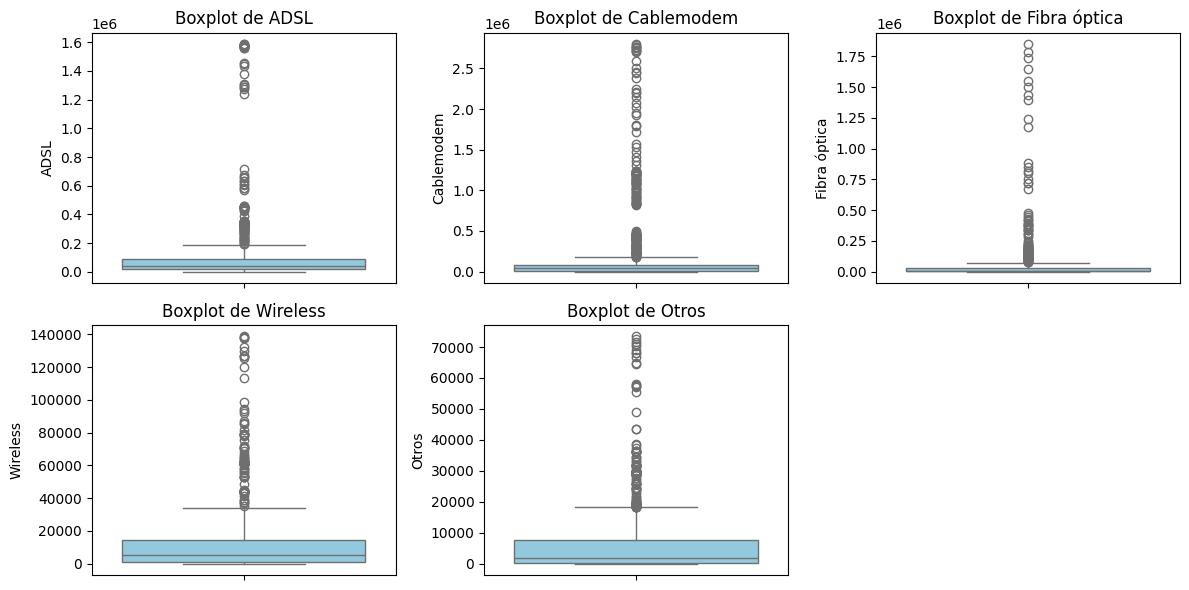

In [21]:
# Columnas clave
columnas_clave = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear un número de filas y columnas en función del número de columnas clave
num_columnas = len(columnas_clave)
num_filas = (num_columnas // 3) + (num_columnas % 3 > 0)  # Calcular el número de filas

plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas_clave, 1):
    # Subplot dinámico según número de columnas
    plt.subplot(num_filas, 3, i)  
    sns.boxplot(y=df_accesos[columna], color="skyblue")
    plt.title(f"Boxplot de {columna}")

plt.tight_layout()  # Ajustar el espaciado
plt.show()

**Análisis de Contexto Regional**  
Los outliers en ADSL y Wireless reflejan características regionales importantes. Buenos Aires destaca por su población y avanzada infraestructura tecnológica, lo que justifica sus valores elevados. Córdoba, como polo económico y tecnológico, presenta picos en conexiones impulsados por ciudades como Córdoba capital. En San Luis, programas provinciales y conectividad rural explican los valores extremos. Estos datos no son errores, sino patrones reales influenciados por factores demográficos y tecnológicos, por lo que analizaré los outliers en su contexto para no perder información clave.

#### **Justificación del Gráfico Comparativo**  
El gráfico comparativo incluirá todas las provincias para validar que los outliers en Buenos Aires, Córdoba y San Luis reflejan inversiones y condiciones específicas, no errores. Permitirá analizar diferencias regionales y situar estas provincias dentro del contexto nacional, fortaleciendo mi análisis sobre las dinámicas tecnológicas en Argentina.

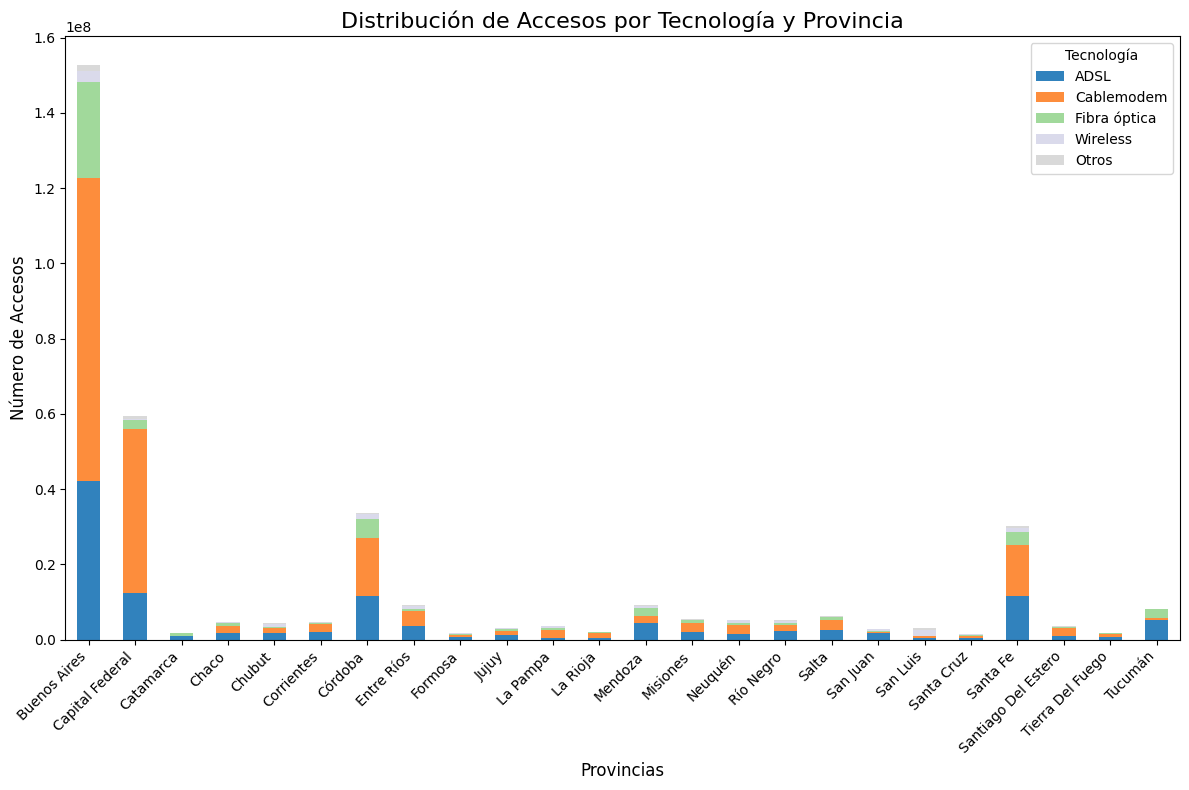

In [22]:
# Agrupamos los datos por provincia y sumamos los accesos por tecnología
df_provincias = df_accesos.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 8))
df_provincias.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')

# Personalización
ax.set_title('Distribución de Accesos por Tecnología y Provincia', fontsize=16)
ax.set_xlabel('Provincias', fontsize=12)
ax.set_ylabel('Número de Accesos', fontsize=12)
ax.legend(title='Tecnología', loc='upper right', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()


El gráfico muestra que Buenos Aires, Córdoba y San Luis sobresalen en accesos a Internet. Buenos Aires lidera por su densidad y tecnología avanzada, Córdoba destaca como polo tecnológico, y San Luis refleja el impacto de sus programas provinciales. Esto respalda que los outliers representan patrones regionales y no errores.

#### **Conclusiones Finales de EDA**  
En mi análisis, identifiqué y manejé valores nulos, duplicados y outliers. Los outliers presentes en las columnas como "ADSL", "Wireless" y "Total" se deben a características específicas de las regiones y no se consideran errores. Tras la limpieza y el examen de los datos, concluyo que están listos para ser guardados y utilizados en futuras etapas de análisis, lo que permitirá un estudio más profundo y preciso de las tendencias y patrones detectados.

####  **Guardar el DataFrame limpio en otra carpeta** 

In [23]:
# Guardar el DataFrame limpio como un archivo CSV
output_path_accesos = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Accesos Por Tecnología.csv'
df_accesos.to_csv(output_path_accesos, index=False)

print(f'Archivo guardado en: {output_path_accesos}')

Archivo guardado en: C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Accesos Por Tecnología.csv


#### **Penetracion-hogares.csv**

In [24]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Penetracion-hogares.csv'
df_hogares = pd.read_csv(ruta)

# Ver las primeras filas
print("* Primeras filas del archivo:")
df_hogares.head()


* Primeras filas del archivo:


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


#### **Inspección inicial del dataset**

In [25]:
print(df_hogares.info())  # Información general
print(df_hogares.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
               Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                      9.513970
25%    2016.000000     1.000000                     33.957657
50%    2019.000000     2.000000                     50.133004
75%    2021.000000     3.000000        

**Análisis**: Al analizar los datos, observo que las columnas tienen tipos de datos adecuados. Los datos no presentan valores nulos ni duplicados, lo que garantiza la integridad del dataset. En cuanto a los valores de accesos, la media es 52.8, con un rango que va de 9.5 a 124.06, lo que indica disparidades significativas entre provincias, especialmente entre las más urbanizadas y las de menor infraestructura. Este análisis me permitirá identificar patrones regionales y trabajar con datos confiables.

In [26]:
# Verificar duplicados
duplicados = df_hogares.duplicated().sum()

if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")


No se encontraron filas duplicadas.


#### **Detección y Análisis de Outliers**  
Realizaré un análisis de outliers en la columna "Accesos por cada 100 hogares" utilizando el método de los cuartiles (IQR). Identificaré los valores extremos que puedan influir en el análisis y determinaré si es necesario tratarlos o si reflejan patrones regionales.

In [27]:
# Calcular el IQR
Q1 = df_hogares['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df_hogares['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_hogares[(df_hogares['Accesos por cada 100 hogares'] < limite_inferior) | 
                      (df_hogares['Accesos por cada 100 hogares'] > limite_superior)]

# Mostrar los outliers
print("Outliers detectados:")
print(outliers)

# Mostrar la cantidad de outliers y los límites
print(f"\nLímite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print(f"Cantidad de outliers: {len(outliers)}")


Outliers detectados:
      Año  Trimestre        Provincia  Accesos por cada 100 hogares
25   2024          1  Capital Federal                    119.530000
49   2023          4  Capital Federal                    117.020000
121  2023          1  Capital Federal                    122.590000
145  2022          4  Capital Federal                    122.730000
169  2022          3  Capital Federal                    122.280000
193  2022          2  Capital Federal                    121.310000
625  2017          4  Capital Federal                    122.897424
649  2017          3  Capital Federal                    121.858326
673  2017          2  Capital Federal                    124.061394
721  2016          4  Capital Federal                    120.631332
745  2016          3  Capital Federal                    120.772878
769  2016          2  Capital Federal                    120.039535
817  2015          4  Capital Federal                    118.130363
841  2015          3  Capit

**Análisis**: Estos valores elevados podrían ser indicativos de condiciones particulares en "Capital Federal", como un mayor acceso a tecnología o proyectos de conectividad que aumentan el número de accesos por hogar, lo cual puede justificar estos valores sin considerarlos como errores. Es importante tener en cuenta el contexto de la región antes de tomar decisiones sobre si deben ser tratados o no.

#### **Conclusiones Finales de EDA**  
En este análisis, revisé el archivo de datos y traté problemas potenciales como valores nulos, duplicados y outliers. Los outliers detectados en "Accesos por cada 100 hogares" se explican por diferencias regionales y no se consideran errores. Tras un análisis exhaustivo, confirmé que los datos han sido limpiados y preparados adecuadamente. El archivo está listo para guardarse y ser utilizado en la siguiente etapa del análisis, lo que permitirá profundizar en el estudio y obtener conclusiones más precisas.

####  **Guardar el DataFrame limpio en otra carpeta** 

In [28]:
# Cargar el archivo CSV en un DataFrame
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Penetracion-hogares.csv'
df_hogares = pd.read_csv(ruta)

# Definir la nueva ruta de guardado, manteniendo el mismo nombre del archivo
output_path_hogares = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetracion-hogares.csv'

# Guardar el DataFrame 'df_hogares' como un archivo CSV en la nueva ruta
df_hogares.to_csv(output_path_hogares, index=False)

# Confirmar que el archivo fue guardado correctamente
print(f'Archivo guardado en: {output_path_hogares}')


Archivo guardado en: C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetracion-hogares.csv


#### **Penetración-poblacion.csv**

In [29]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Penetración-poblacion.csv'
df_poblacion = pd.read_csv(ruta)

# Ver las primeras filas
print("* Primeras filas del archivo:")
df_poblacion.head()


* Primeras filas del archivo:


,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


#### **Inspección inicial del dataset**

In [30]:
print(df_poblacion.info())  # Información general
print(df_poblacion.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
               Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000  

**Análisis**: Al analizar los datos, observo que las columnas tienen tipos de datos adecuados. El conjunto de datos no requiere de eliminación o tratamiento de valores nulos ni de duplicados en este caso.
En cuanto a las estadísticas descriptivas, la columna "Accesos por cada 100 hab" tiene un valor promedio de 15.73, con una desviación estándar de 9.24. El valor mínimo es 2.72 y el máximo 52.24. La distribución de la columna es relativamente amplia, con una mediana de 13.67 y un rango intercuartílico de aproximadamente 9 a 20, lo que sugiere que la mayoría de los valores se concentran en un rango bajo a medio.

In [31]:
# Verificar duplicados
duplicados = df_poblacion.duplicated().sum()

if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")


No se encontraron filas duplicadas.


#### **Detectar y visualizar outliers**

* Outliers identificados:
      Año  Trimestre        Provincia  Accesos por cada 100 hab
1    2024          2  Capital Federal                 47.440000
25   2024          1  Capital Federal                 48.780000
49   2023          4  Capital Federal                 47.800000
73   2023          3  Capital Federal                 47.600000
97   2023          2  Capital Federal                 47.270000
121  2023          1  Capital Federal                 50.230000
145  2022          4  Capital Federal                 50.350000
169  2022          3  Capital Federal                 50.220000
193  2022          2  Capital Federal                 49.873561
217  2022          1  Capital Federal                 46.014348
241  2021          4  Capital Federal                 45.848511
265  2021          3  Capital Federal                 45.900383
289  2021          2  Capital Federal                 45.487190
313  2021          1  Capital Federal                 44.826990
337  2020     

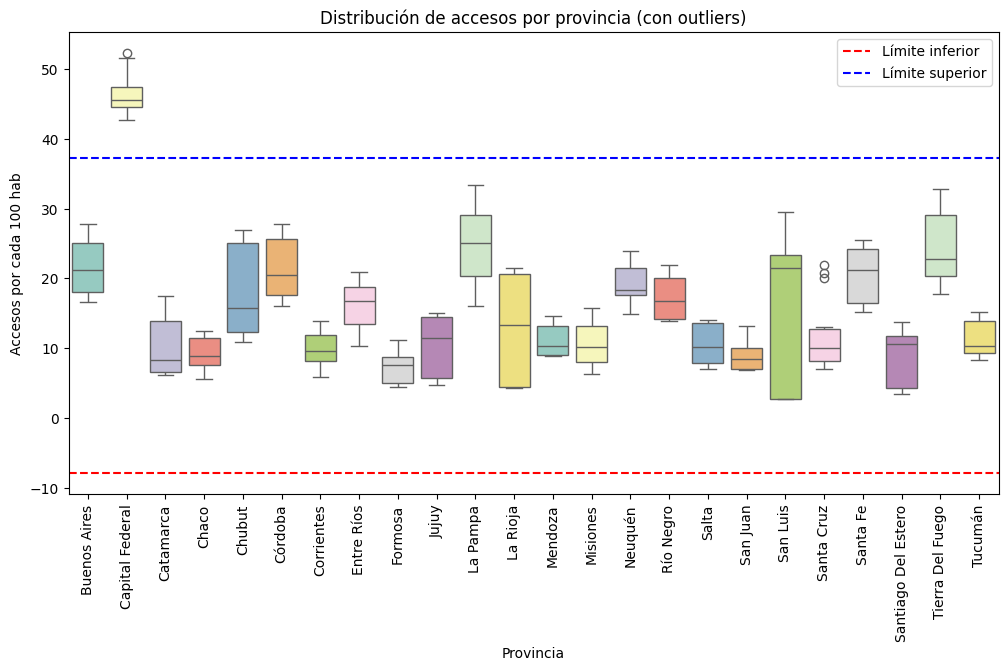

In [32]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Penetración-poblacion.csv'
df_poblacion = pd.read_csv(ruta)

# Calcular los cuartiles y límites para detectar outliers
q1 = df_poblacion['Accesos por cada 100 hab'].quantile(0.25)
q3 = df_poblacion['Accesos por cada 100 hab'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificar outliers
outliers = df_poblacion[(df_poblacion['Accesos por cada 100 hab'] < limite_inferior) | 
                        (df_poblacion['Accesos por cada 100 hab'] > limite_superior)]

# Mostrar los outliers
print("* Outliers identificados:")
print(outliers)

# Visualizar los datos y los outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_poblacion, palette='Set3')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite superior')
plt.title('Distribución de accesos por provincia (con outliers)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### **Análisis del Gráfico Boxplot para Detección de Outliers**  
El **boxplot** revela **outliers** en provincias como **Capital Federal** y **Santa Cruz**, que podrían deberse a mejoras en infraestructura o políticas específicas. **San Luis** muestra variabilidad en los accesos, pero dentro de los límites normales. Por otro lado, provincias como **Formosa**, **Jujuy** y **Santa Fe** tienen distribuciones estables y sin outliers, lo que sugiere una cobertura más homogénea. En general, los outliers reflejan desigualdades en el acceso y oportunidades de mejora, mientras que las provincias estables podrían necesitar estrategias diferenciadas para reducir las brechas de conectividad.

#### **Conclusiones Finales de EDA**  
En el análisis exploratorio de datos, identifiqué tendencias y relaciones importantes entre las variables. Detecté outliers en algunas provincias, como Capital Federal y Santa Cruz, que podrían estar relacionados con eventos puntuales o avances en infraestructura. También observé una variabilidad marcada en ciertas provincias, mientras que otras mostraron distribuciones más estables. En general, los datos han sido preparados adecuadamente y están listos para continuar con el análisis detallado en etapas posteriores.

####  **Guardar el DataFrame limpio en otra carpeta** 

In [33]:
# Cargar el archivo CSV en un DataFrame
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Penetración-poblacion.csv'
df_poblacion = pd.read_csv(ruta)

# Definir la nueva ruta de guardado, manteniendo el mismo nombre del archivo
output_path_poblacion = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetración-poblacion.csv'

# Guardar el DataFrame 'df_poblacion' como un archivo CSV en la nueva ruta
df_poblacion.to_csv(output_path_poblacion, index=False)

# Confirmar que el archivo fue guardado correctamente
print(f'Archivo guardado en: {output_path_poblacion}')

Archivo guardado en: C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetración-poblacion.csv


#### **Totales Accesos Por Tecnología.csv**

In [34]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Totales Accesos Por Tecnología.csv'
df_TotalesAccesos = pd.read_csv(ruta)

# Ver las primeras filas
print("* Primeras filas del archivo:")
df_TotalesAccesos.head()

* Primeras filas del archivo:


,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


#### **Inspección inicial del dataset**

In [35]:
print(df_TotalesAccesos.info())  # Información general
print(df_TotalesAccesos.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB
None
               Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%   

**Análisis**: Al analizar los datos, observo que las columnas tienen tipos de datos adecuados. El conjunto de datos no requiere de eliminación o tratamiento de valores nulos ni de duplicados en este caso.
Las estadísticas descriptivas muestran que los accesos totales oscilan entre 6.4 millones y 11.6 millones, con un promedio de aproximadamente 8.8 millones. Las tecnologías tienen distintas distribuciones, siendo la Fibra óptica la que presenta una mayor variabilidad. El año de los registros abarca de 2014 a 2024.

In [36]:
# Verificar duplicados
duplicados = df_TotalesAccesos.duplicated().sum()

if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")


No se encontraron filas duplicadas.


#### **Detectar y visualizar outliers**

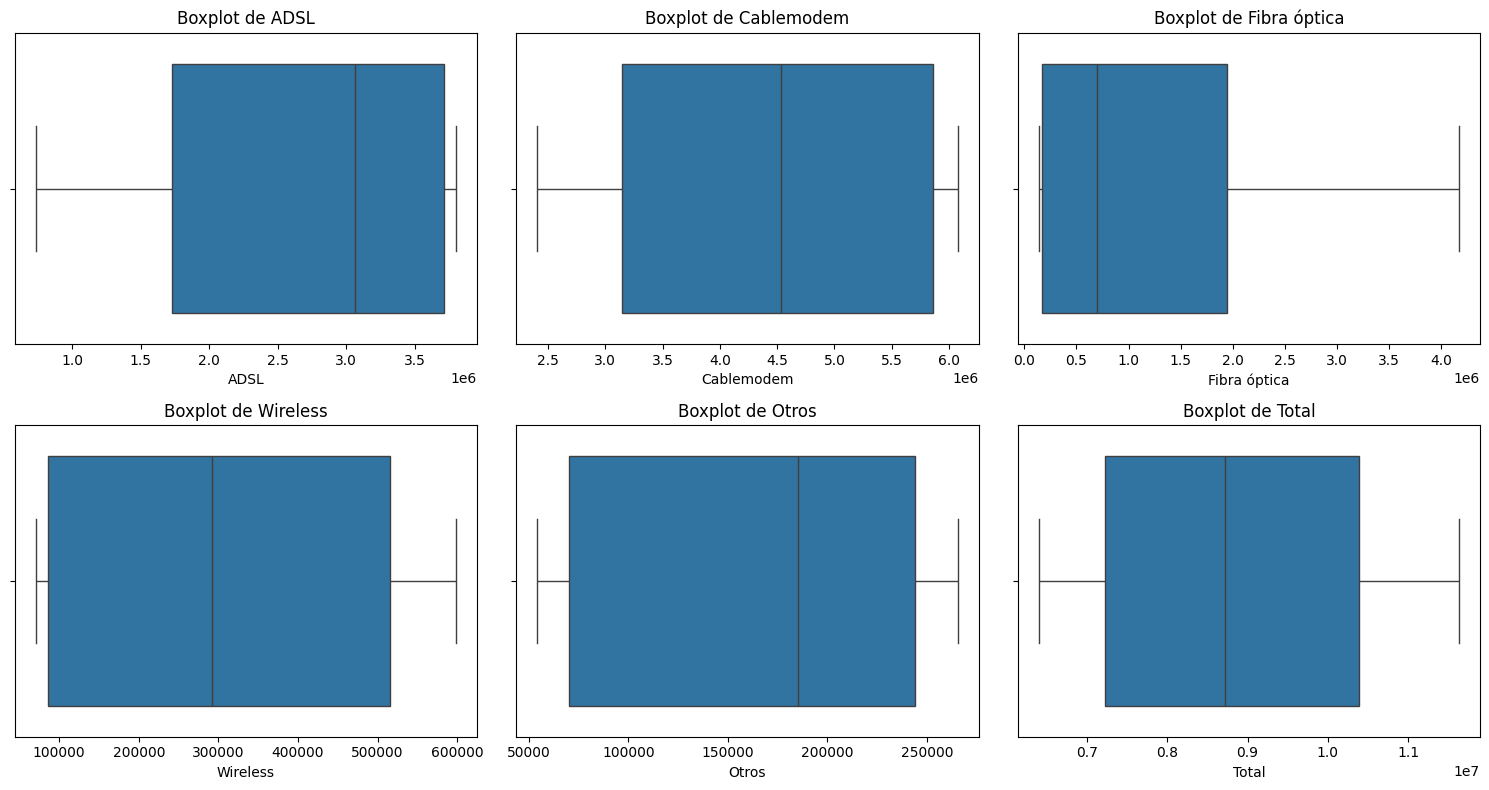

In [37]:
# Definir las columnas que deseas graficar
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Crear un conjunto de subgráficos (2 filas por 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Iterar sobre las columnas y los subgráficos
for i, col in enumerate(columnas):
    ax = axes[i // 3, i % 3]  # Seleccionar la ubicación del subgráfico
    sns.boxplot(x=df_TotalesAccesos[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')

# Ajustar la disposición para evitar que se solapen
plt.tight_layout()
plt.show()



**Análisis**: Analicé outliers en ADSL, Cablemodem, Fibra Óptica, Wireless, Otros y Total mediante boxplots. No identifiqué valores extremos visuales, ya que los bigotes están dentro de rangos razonables. Continuaré verificando con estadísticas descriptivas (IQR) para confirmar y decidir si es necesario tratarlos.

#### **Calcular estadísticas descriptivas y detectar outliers**

In [38]:
# Calcular cuartiles y el IQR para cada columna
stats = df_TotalesAccesos[columnas].describe()

# Calcular el IQR
Q1 = stats.loc['25%']
Q3 = stats.loc['75%']
IQR = Q3 - Q1

# Detectar outliers: valores menores a Q1 - 1.5*IQR o mayores a Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = (df_TotalesAccesos[columnas] < lower_bound) | (df_TotalesAccesos[columnas] > upper_bound)

# Mostrar los outliers para cada columna
outliers_count = outliers.sum()

# Mostrar estadísticas descriptivas y número de outliers
print(stats)
print("\nNúmero de outliers por columna:")
print(outliers_count)


               ADSL    Cablemodem  Fibra óptica       Wireless          Otros  \
count  4.200000e+01  4.200000e+01  4.200000e+01      42.000000      42.000000   
mean   2.694844e+06  4.433906e+06  1.224694e+06  304293.214286  158186.071429   
std    1.094347e+06  1.319783e+06  1.321136e+06  203202.399993   82363.507846   
min    7.334910e+05  2.407330e+06  1.391870e+05   70749.000000   54300.000000   
25%    1.730869e+06  3.146292e+06  1.719410e+05   85390.500000   70430.000000   
50%    3.061623e+06  4.535507e+06  6.989465e+05  292223.000000  185221.000000   
75%    3.713298e+06  5.857192e+06  1.945689e+06  515434.000000  244069.500000   
max    3.803024e+06  6.073426e+06  4.169958e+06  598682.000000  265328.000000   

              Total  
count  4.200000e+01  
mean   8.815923e+06  
std    1.733189e+06  
min    6.398398e+06  
25%    7.218131e+06  
50%    8.720658e+06  
75%    1.038873e+07  
max    1.163316e+07  

Número de outliers por columna:
ADSL            0
Cablemodem      0
Fib

**Análisis**: He calculado las estadísticas descriptivas para las columnas ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total. Para confirmar si había outliers, utilicé los cuartiles y el rango intercuartil (IQR). Al hacerlo, observé que no existen valores fuera de los límites definidos por el IQR en ninguna de estas columnas. Esto significa que no hay outliers en los datos.

#### **Conclusiones Finales de EDA**  
En el análisis exploratorio de datos, observé que las variables ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total no presentan outliers significativos. Las distribuciones de estas variables resultaron ser consistentes y los boxplots no evidenciaron valores extremos. Además, los cálculos del rango intercuartílico (IQR) confirmaron la ausencia de outliers. Por lo tanto, los datos han sido limpiados y se encuentran en condiciones adecuadas para proceder con el análisis posterior.

####  **Guardar el DataFrame limpio en otra carpeta** 

In [39]:
# Cargar el archivo CSV en un DataFrame
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Totales Accesos Por Tecnología.csv'
df_TotalesAccesos = pd.read_csv(ruta)

# Definir la nueva ruta de guardado, manteniendo el mismo nombre del archivo
output_path_TotalesAccesos = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Totales Accesos Por Tecnología.csv'

# Guardar el DataFrame 'df_TotalesAccesos' como un archivo CSV en la nueva ruta
df_TotalesAccesos.to_csv(output_path_TotalesAccesos, index=False)

# Confirmar que el archivo fue guardado correctamente
print(f'Archivo guardado en: {output_path_TotalesAccesos}')

Archivo guardado en: C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Totales Accesos Por Tecnología.csv


#### **Ingresos .csv**

In [40]:
# Cargar el archivo
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Ingresos .csv'
df_ingresos = pd.read_csv(ruta)

# Ver las primeras filas
print("* Primeras filas del archivo:")
df_ingresos.head()

* Primeras filas del archivo:


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


#### **Inspección inicial del dataset**

In [41]:
print(df_ingresos.info())  # Información general
print(df_ingresos.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None
               Año  Trimestre  Ingresos (miles de pesos)
count    42.000000  42.000000               4.200000e+01
mean   2019.000000   2.452381               5.001648e+07
std       3.728597   1.130560               8.710208e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.250000               7.055326e+06
50%    2019.000000   2.000000               2.047527e+07
75%    2021.000000   3.000000               4.485090e+07
max    2033.000000   4.000000          

**Análisis:** El DataFrame contiene 42 registros de ingresos trimestrales de una empresa, con datos entre 2014 y 2033. Los ingresos varían considerablemente, con una media de aproximadamente 50 millones de pesos y una desviación estándar alta, lo que indica variabilidad. Los trimestres cubren de forma uniforme todos los valores, con la mayoría de los registros entre 2016 y 2021. No hay valores nulos, lo que facilita un análisis sin necesidad de limpieza adicional.

In [42]:
# Verificar duplicados
duplicados = df_poblacion.duplicated().sum()

if duplicados > 0:
    print(f"Se encontraron {duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")


No se encontraron filas duplicadas.


#### **Detectar y visualizar outliers**  
Para detectar outliers en "Ingresos (miles de pesos)", calculo los cuartiles (Q1, Q3) y el rango intercuartílico (IQR), y luego defino los límites inferior y superior (1.5 * IQR) para identificar los valores fuera de ese rango.

In [43]:
Q1 = df_ingresos['Ingresos (miles de pesos)'].quantile(0.25)
Q3 = df_ingresos['Ingresos (miles de pesos)'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = df_ingresos[(df_ingresos['Ingresos (miles de pesos)'] < limite_inferior) | (df_ingresos['Ingresos (miles de pesos)'] > limite_superior)]

# Mostrar los outliers
print(outliers)

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023
5  2033          1               1.041350e+08   Ene-Mar 2023


**Análisis**: Veo un error en los datos, en la última fila, el año 2033 esto podría ser un error tipográfico y debería corregirse a 2023. Parece un outlier, y el periodo "Jun-Mar 2023" no corresponde a un trimestre válido. Debería corregir ambos problemas. 

#### **Corregir errores de escritura**

In [44]:
# Corregir año fuera de rango
df_ingresos.loc[df_ingresos['Año'] > 2024, 'Año'] = 2023

# Verificar y corregir periodos no válidos
df_ingresos['Periodo'] = df_ingresos['Periodo'].replace({'Jun-Mar 2023': 'Abr-Jun 2023'})

# Revisar los resultados
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Abr-Jun 2023


**Análisis:** Al comparar los ingresos de 2023 y 2024 con la media general de 50,016,480 pesos, observo que ambos años destacan significativamente. En 2023, los ingresos en los trimestres reportados están muy por encima de la media: Oct-Dic alcanza 167,376,000 pesos (3.35 veces la media), Jul-Sep llega a 133,106,600 pesos (2.66 veces la media) y Abr-Jun registra 118,060,300 pesos (2.36 veces la media). Esto refleja un crecimiento sostenido en este período.

En 2024, el incremento es aún más notable. En Ene-Mar los ingresos suman 346,199,000 pesos (6.92 veces la media) y en Abr-Jun ascienden a 442,032,200 pesos (8.83 veces la media). Esto evidencia un salto excepcional respecto a 2023 y al promedio histórico.

Concluyo que los años 2023 y 2024 marcan un crecimiento extraordinario, especialmente 2024, que muestra un avance acelerado. Es posible que este comportamiento esté relacionado con factores específicos, como la expansión de operaciones o cambios en el mercado.

#### **Gráfico de barras que muestra la evolución de los ingresos por período.**

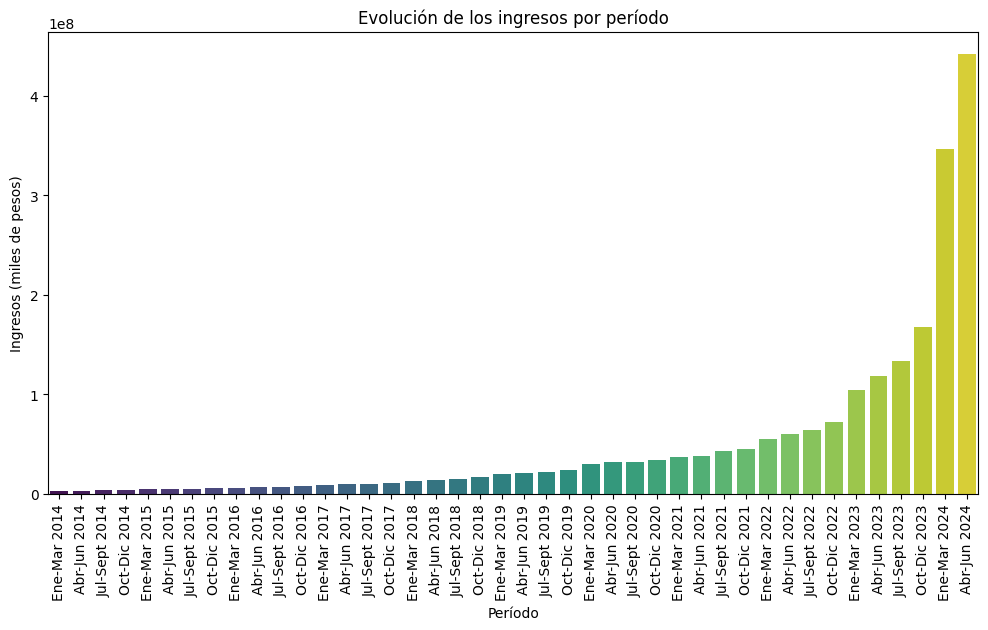

In [45]:
# Ordenar los datos por año y trimestre
df_ingresos = df_ingresos.sort_values(by=['Año', 'Trimestre'])

# Gráfico de barras: Evolución de ingresos por período
plt.figure(figsize=(12, 6))
sns.barplot(data=df_ingresos, x='Periodo', y='Ingresos (miles de pesos)', palette='viridis')
plt.xticks(rotation=90)
plt.title('Evolución de los ingresos por período')
plt.xlabel('Período')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

**Conclusión**: El gráfico ilustra un crecimiento sobresaliente en los ingresos en 2023 y un aumento acelerado en 2024. Estos resultados podrían estar impulsados por factores clave específicos que podrían ser analizados con mayor detalle para comprender mejor la causa de este salto.

#### **Visualizar los outliers con un boxplot**

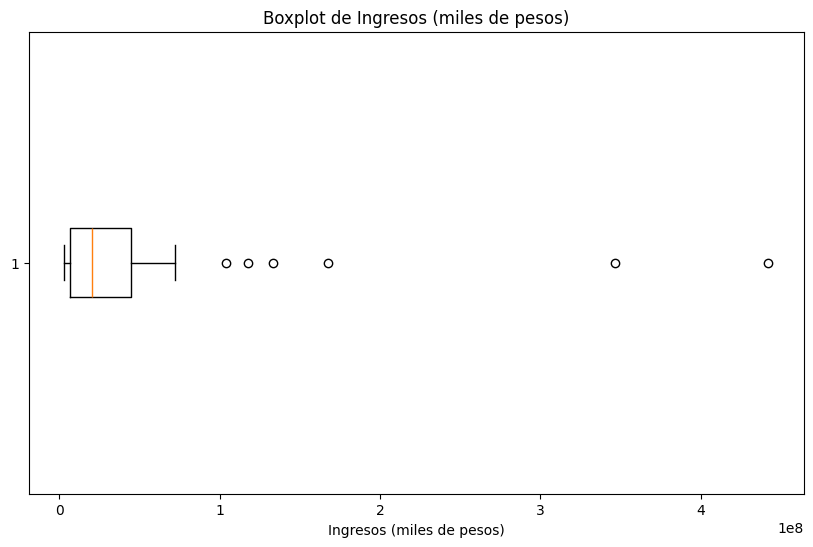

In [46]:
# Visualizar los outliers con un boxplot para 'Ingresos (miles de pesos)'
plt.figure(figsize=(10, 6))
plt.boxplot(df_ingresos['Ingresos (miles de pesos)'], vert=False)
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.show()


**Análisis**: Al observar los outliers, veo que se ubican en el extremo superior del gráfico, lo que indica que hay algunos registros con ingresos muy altos. Esto puede ser relevante porque esos valores podrían estar relacionados con ciertos eventos excepcionales o grandes empresas que tienen ingresos fuera de lo común. Es fundamental decidir si estos datos deben eliminarse, mantenerse o ser transformados para que no influyan negativamente.

#### **Impacto de la Devaluación y Ajuste de Ingresos en Argentina (2023)**  
El aumento en los ingresos del sector telecomunicaciones en 2023 y 2024 refleja, en parte, la devaluación del peso (>50%) y la alta inflación. He ajustado los ingresos de 2014-2023 usando 2014 como base, para comparar ingresos reales y descontar efectos inflacionarios. La nueva columna **Ingresos Ajustados por Inflación** muestra estos valores corregidos para un análisis más claro.

In [47]:
# Diccionario con los índices de inflación 2014 - 2023 
inflacion = {
    2023: 124.4,  # Inflación anual de 2023
    2022: 94.8,   # Inflación anual de 2022
    2021: 50.9,   # Inflación anual de 2021
    2020: 36.1,   # Inflación anual de 2020
    2019: 53.5,   # Inflación anual de 2019
    2018: 47.6,   # Inflación anual de 2018
    2017: 24.8,   # Inflación anual de 2017
    2016: 41.5,   # Inflación anual de 2016
    2015: 26.9,   # Inflación anual de 2015
    2014: 38.5    # Inflación anual de 2014
}

# Se ajustan los ingresos por inflación (suponiendo que 2014 es el año base)
def ajustar_por_inflacion(columna, inflacion, anio_base=2014):
    anio = columna['Año']  # Columna que contiene el año
    inflacion_base = inflacion[anio_base]
    
    # Verificar si el año existe en el diccionario de inflación
    if anio in inflacion:
        inflacion_anio = inflacion[anio]
        return columna['Ingresos (miles de pesos)'] * (inflacion_base / inflacion_anio)
    else:
        # Si no existe, devuelve el ingreso original o aplica una estrategia alternativa
        return columna['Ingresos (miles de pesos)']  # Ajustar según convenga

# Se añade una columna con los valores ajustados por inflación
df_ingresos['Ingresos Ajustados por Inflación'] = df_ingresos.apply(ajustar_por_inflacion, axis=1, inflacion=inflacion)


#### **Gráfico de áreas que compara la evolución de los ingresos originales y los ajustados por inflación en distintos periodos.**

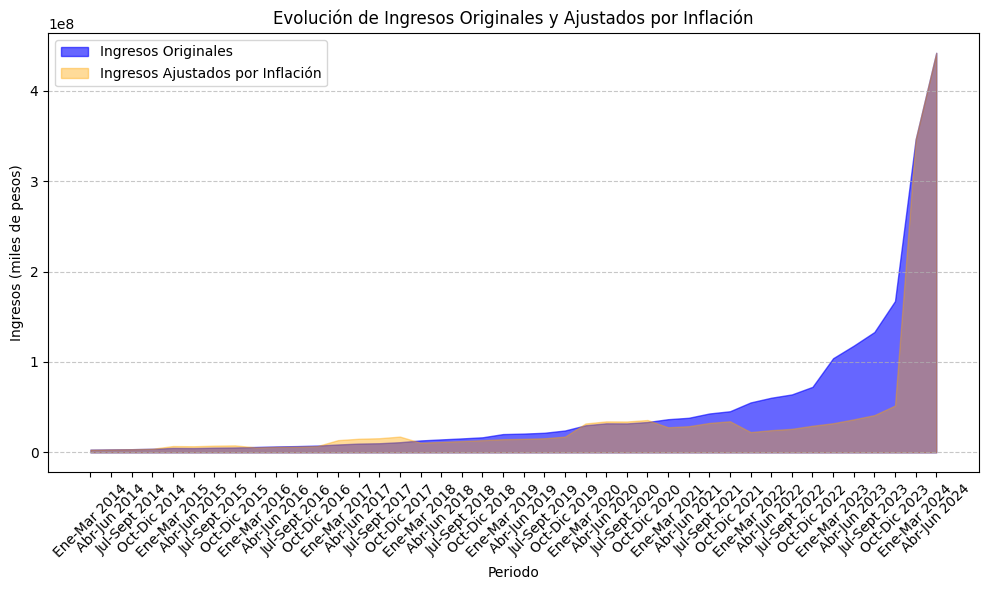

In [48]:
# Crear una figura y graficar las áreas de ingresos originales y ajustados
plt.figure(figsize=(10, 6))

# Graficar los ingresos originales y ajustados por inflación
plt.fill_between(df_ingresos['Periodo'], df_ingresos['Ingresos (miles de pesos)'], label='Ingresos Originales', alpha=0.6, color='blue')
plt.fill_between(df_ingresos['Periodo'], df_ingresos['Ingresos Ajustados por Inflación'], label='Ingresos Ajustados por Inflación', alpha=0.4, color='orange')

# Personalizar el gráfico
plt.title('Evolución de Ingresos Originales y Ajustados por Inflación')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la disposición y mostrar el gráfico
plt.tight_layout()
plt.show()


**Análisis**: El gráfico muestra que los ingresos nominales en el sector telecomunicaciones en Argentina crecieron notablemente, pero al ajustarlos por inflación, el crecimiento real es más modesto. Esto indica que el aumento se debe principalmente a la inflación y la devaluación del peso, más que a un crecimiento genuino. Para los KPIs, es clave medir los ingresos reales ajustados, ya que reflejan mejor la situación económica y ayudan a definir metas más realistas.


### **Detección de Outliers**
Podemos analizar los outliers en la columna de ingresos ajustados utilizando un boxplot para identificar visualmente los valores extremos. 

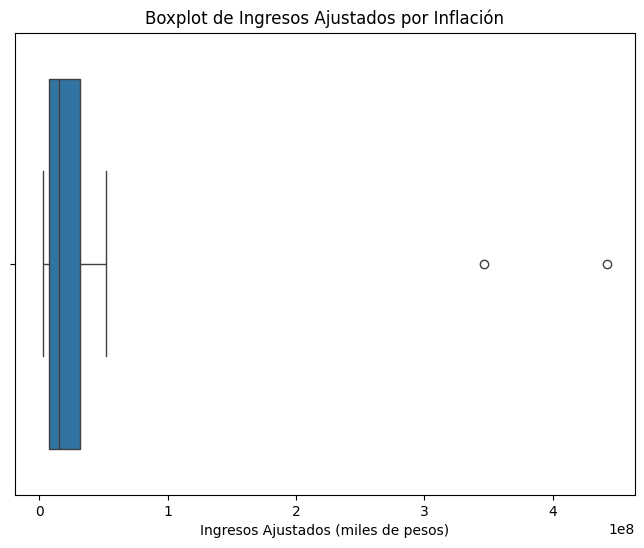

In [49]:
# Crear el boxplot para los ingresos ajustados
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ingresos, x='Ingresos Ajustados por Inflación')

# Personalizar el gráfico
plt.title('Boxplot de Ingresos Ajustados por Inflación')
plt.xlabel('Ingresos Ajustados (miles de pesos)')

# Mostrar el gráfico
plt.show()




**Análisis del boxplot:**

El boxplot muestra que la mayoría de los ingresos ajustados están concentrados en un rango estrecho, con algunos valores atípicos significativamente altos. Estos outliers indican períodos excepcionales que podrían influir en el análisis de KPIs. La mediana estable sugiere consistencia, pero los ingresos extremos deben analizarse más a fondo para entender su causa.

#### **Identificación de Outliers en los Ingresos Ajustados por Inflación**  
Para analizar los valores atípicos y su impacto, puedo identificar y listar esos outliers.

In [50]:
# Calcular los límites para identificar los outliers
q1 = df_ingresos['Ingresos Ajustados por Inflación'].quantile(0.25)
q3 = df_ingresos['Ingresos Ajustados por Inflación'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar los outliers
outliers = df_ingresos[(df_ingresos['Ingresos Ajustados por Inflación'] < limite_inferior) | 
                        (df_ingresos['Ingresos Ajustados por Inflación'] > limite_superior)]

# Mostrar los outliers
print("Valores atípicos encontrados:")
print(outliers)


Valores atípicos encontrados:
    Año  Trimestre  Ingresos (miles de pesos)       Periodo  \
1  2024          1               3.461990e+08  Ene-Mar 2024   
0  2024          2               4.420322e+08  Abr-Jun 2024   

   Ingresos Ajustados por Inflación  
1                      3.461990e+08  
0                      4.420322e+08  


**Justificación para Conservar los Valores Atípicos**: Conservar los valores atípicos de 2024 permite reflejar de manera más realista el comportamiento del mercado, incluyendo eventos extraordinarios que pueden impactar la variación de ingresos. Aunque estos valores pueden alterar la tendencia promedio, proporcionan un panorama completo de cómo factores excepcionales afectan los resultados y ayudan a preparar estrategias que contemplen posibles fluctuaciones futuras.

#### **Conclusiones Finales de EDA**  
En el análisis exploratorio, observé que las variables Año, Trimestre e Ingresos (miles de pesos) muestran un aumento sostenido. Detecté outliers en 2024, relacionados con eventos económicos como la devaluación. Decidí conservar estos valores atípicos para reflejar mejor la realidad económica y capturar el impacto de eventos extraordinarios en el análisis. Esto permite un entendimiento más completo de las variaciones en los ingresos y prepara mejor para futuras decisiones estratégicas. Los datos están ahora listos para análisis futuros.

####  **Guardar el DataFrame limpio en otra carpeta** 

In [51]:
# Cargar el archivo CSV en un DataFrame
ruta = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\Ingresos .csv'
df_ingresos = pd.read_csv(ruta)

# Definir la nueva ruta de guardado, manteniendo el mismo nombre del archivo
output_path_ingresos = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Ingresos .csv'

# Guardar el DataFrame 'df_ingresos' como un archivo CSV en la nueva ruta
df_ingresos.to_csv(output_path_ingresos, index=False)

# Confirmar que el archivo fue guardado correctamente
print(f'Archivo guardado en: {output_path_ingresos}')

Archivo guardado en: C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Ingresos .csv
